1.What types of disasters have been recorded worldwide to date?
2.Which regions, both in the U.S. and globally, emerge as the most resilient and desirable places to live in the context of natural disaster risks?
3.What are the global patterns in natural and technological disasters, comparing across countries, continents, and U.S. states? 

4.How do storm patterns and trends compare globally, within the U.S., and specifically in Florida?
5.During which time of year do storms most frequently impact Florida and the southeastern U.S. coast?

Assumption : 
Season Definition : Winter is considered December, January and February; spring is March through May; summer is June through August; and fall or autumn is September through November
Southeastern States: Alabama, Arkansas, Florida, Georgia, Kentucky, Louisiana, Mississippi, North Carolina, South Carolina and Tennessee, as well as Puerto Rico and the U.S. Virgin Islands)


In [44]:
%matplotlib inline
#!pip install -r requirements.txt
import numpy as np
import pandas as pd
import us
import re
import geocoder
import regex
import re
import matplotlib.pyplot as plt
#import geopandas as gpd
import seaborn as sns
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

from collections import defaultdict

# Load Matplotlib's built-in world map
#from mpl_toolkits.basemap import Basemap

Color Palette Constants

In [45]:
berkeley_palette_primary = ["#002676", "#FDB515"]# Skipping white "#FFFFFF"
berkeley_palette_preferred_dark = ["#010133","#FC9313", "#00553A","#770747","#431170"]
                    
berkeley_palette_alternative_medium=["#004AAE","#FFC31B","#018943","#E7115E","#8236C7"]
berkeley_palette_alternative_light = ["#9FD1FF","#FFE88D","#B3E59A","#FFCFE5","#FFCFE5"]
berkeley_palette_black_grey=["#808080","#808080"]#Skipping black "#000000"

berkeley_palette_special_colors = ["#C09748"]
berkeley_palette_all = berkeley_palette_primary+berkeley_palette_preferred_dark+berkeley_palette_alternative_medium+berkeley_palette_alternative_light+berkeley_palette_special_colors+berkeley_palette_black_grey
text_props = {'color':"w"}
berkeley_palette_all

['#002676',
 '#FDB515',
 '#010133',
 '#FC9313',
 '#00553A',
 '#770747',
 '#431170',
 '#004AAE',
 '#FFC31B',
 '#018943',
 '#E7115E',
 '#8236C7',
 '#9FD1FF',
 '#FFE88D',
 '#B3E59A',
 '#FFCFE5',
 '#FFCFE5',
 '#C09748',
 '#808080',
 '#808080']

US State Constants

In [46]:
us_state_names = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina",
    "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
    "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah",
    "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]
us_states_abbr = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", 
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", 
    "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", 
    "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", 
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", 
    "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", 
    "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", 
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", 
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", 
    "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", 
    "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", 
    "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", 
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", 
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", 
    "Wisconsin": "WI", "Wyoming": "WY"
}
us_state_correction = {
        "au large de la californie": "California",
        "Pacifique":"California",
        "au large de la Californie":"California",
        "nouveau mexique": "New Mexico",
        "chicago": "Illinois",
        "los angeles": "California",
        "swisher districts": "Texas",
        "rhode isl. ": "Rhode Island",
        "near los angeles": "California",
        "atlantic terminal station": "New York",
        "north california": "None",
        "los angeles": "California",
        "jerauld": "South Dakota",
        "jefferson davis": "Mississippi",
        "nassau-florida": "Florida",
        "wilkes": "North Carolina",
        "noble in richland": "Illinois",
        "marion-in": "Indiana",
        "central michigan ": "Michigan",
        "south california": "California",
        "south-western louisiana": "Louisiana",
        "north california ": "California",
        "northern washington ": "Washington",
        "central-northern usa": "None",
        "montana and idaho s": "None",
        "hollywood": "California",
        "eastern washington ": "Washington",
        "eastern new mexico": "New Mexico",
        "district of columbia":"Washington, D.C.",
        "Nouveau Mexique" :"New Mexico"
    }

In [47]:
df_continent = pd.read_html('https://statisticstimes.com/geography/countries-by-continents.php')[2]
dict_continent = defaultdict(list)

#df = pd.DataFrame({'Position':[1,2,4,4,4], 'Letter':['a', 'b', 'd', 'e', 'f']})

for idx,row in df_continent.iterrows():
    dict_continent[row['Continent']].append(row['Country or Area'])
dict_continent # we may not need this. we can directly refer to df

defaultdict(list,
            {'Asia': ['Afghanistan',
              'Armenia',
              'Azerbaijan',
              'Bahrain',
              'Bangladesh',
              'Bhutan',
              'Brunei Darussalam',
              'Cambodia',
              'China',
              'China, Hong Kong Special Administrative Region',
              'China, Macao Special Administrative Region',
              'Cyprus',
              "Democratic People's Republic of Korea",
              'Georgia',
              'India',
              'Indonesia',
              'Iran (Islamic Republic of)',
              'Iraq',
              'Israel',
              'Japan',
              'Jordan',
              'Kazakhstan',
              'Kuwait',
              'Kyrgyzstan',
              "Lao People's Democratic Republic",
              'Lebanon',
              'Malaysia',
              'Maldives',
              'Mongolia',
              'Myanmar',
              'Nepal',
              'Oman',
             

In [48]:
data = pd.read_csv("public_emdat_Global_techNnatural.csv")
cols = data.columns
cols

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [49]:
drop_list = ['Historic']
data.drop(drop_list,axis=1,inplace=True)
data.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name',
       'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin',
       'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution ('000 US$)', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
       'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [50]:
newcols=list(map(lambda x : re.sub('\s+|\.|/','',x),data.columns))
newcols = list(map(lambda x : re.sub("\(\'000US\$\)","_000USD",x),newcols))
data.columns = newcols
data.columns

Index(['DisNo', 'ClassificationKey', 'DisasterGroup', 'DisasterSubgroup',
       'DisasterType', 'DisasterSubtype', 'ExternalIDs', 'EventName', 'ISO',
       'Country', 'Subregion', 'Region', 'Location', 'Origin',
       'AssociatedTypes', 'OFDABHAResponse', 'Appeal', 'Declaration',
       'AIDContribution_000USD', 'Magnitude', 'MagnitudeScale', 'Latitude',
       'Longitude', 'RiverBasin', 'StartYear', 'StartMonth', 'StartDay',
       'EndYear', 'EndMonth', 'EndDay', 'TotalDeaths', 'NoInjured',
       'NoAffected', 'NoHomeless', 'TotalAffected',
       'ReconstructionCosts_000USD', 'ReconstructionCosts,Adjusted_000USD',
       'InsuredDamage_000USD', 'InsuredDamage,Adjusted_000USD',
       'TotalDamage_000USD', 'TotalDamage,Adjusted_000USD', 'CPI',
       'AdminUnits', 'EntryDate', 'LastUpdate'],
      dtype='object')

In [51]:
# Add Continent Column 
def add_continent(x):
    if x.Country.values in df_continent['Country or Area'].values:
        indx = x[df_continent['Country or Area']==x.Country.value].index
        x['Continent'] = df_continent.iloc[indx]['Continent']
        #data.iloc[0]['Country']
    return x

In [52]:
data.reset_index(drop=True,inplace=True)
#add_continent(data.head(1))
#data.head(1).Country.values
x=data.head(1)
#x.Country.values in df_continent['Country or Area'].values
#x[df_continent['Country or Area']==x.Country.values].index
continent = df_continent[df_continent['Country or Area'].values==x.Country.values]['Continent'].values # Gives you corresponding continent 
indx = x.index.values
x.Continent = continent
#x.Country.values
x.columns
df_continent.rename(columns={'Country or Area':'Country'},inplace=True)

/var/folders/gj/bbgjz4_x5ybc58ms5zv9p8sr0000gp/T/ipykernel_967/2487822001.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.Continent = continent


In [53]:


data = pd.merge(data, df_continent[['Country','Continent']], on='Country')

data

,DisNo,ClassificationKey,DisasterGroup,DisasterSubgroup,DisasterType,DisasterSubtype,ExternalIDs,EventName,ISO,Country,...,"ReconstructionCosts,Adjusted_000USD",InsuredDamage_000USD,"InsuredDamage,Adjusted_000USD",TotalDamage_000USD,"TotalDamage,Adjusted_000USD",CPI,AdminUnits,EntryDate,LastUpdate,Continent
0,1999-9388-DJI,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25,Africa
1,2000-0432-DJI,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25,Africa
2,2002-0140-DJI,tec-ind-ind-ind,Technological,Industrial accident,Industrial accident (General),Industrial accident (General),NaN,Chromated copper arsenate,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,59.033144,NaN,2005-04-19,2023-09-25,Africa
3,2004-0158-DJI,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm2_code"":15276,""adm2_name"":""Djibouti""}]",2005-10-19,2023-09-25,Africa
4,2005-9213-DJI,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,64.092740,"[{""adm2_code"":15272,""adm2_name"":""Ali Sabieh""},...",2007-02-13,2023-09-25,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15643,2017-0381-VGB,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,GLIDE:TC-2017-000132,Hurricane 'Irma',VGB,British Virgin Islands,...,NaN,NaN,NaN,3000000.0,3729220.0,80.445779,"[{""adm1_code"":39503,""adm1_name"":""Anegada""},{""a...",2017-09-12,2023-09-25,North America
15644,2017-0383-VGB,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Maria',VGB,British Virgin Islands,...,NaN,NaN,NaN,NaN,NaN,80.445779,"[{""adm1_code"":39503,""adm1_name"":""Anegada""},{""a...",2018-04-05,2023-09-25,North America
15645,2018-0020-CUW,tec-tra-wat-wat,Technological,Transport,Water,Water,NaN,Migrants,CUW,Curaçao,...,NaN,NaN,NaN,NaN,NaN,82.410668,NaN,2018-01-18,2023-09-25,North America
15646,2020-0051-IMN,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Storm 'Ciara' (Sabine),IMN,Isle of Man,...,NaN,NaN,NaN,NaN,NaN,88.929493,NaN,2021-05-22,2023-09-25,Europe


In [54]:
diaster_start_year =data['EndYear'].min() # 2001
diaster_end_year = data['EndYear'].max() # 2024 

In [55]:
data_natural = data[data["DisasterGroup"]=='Natural']
data_natural


,DisNo,ClassificationKey,DisasterGroup,DisasterSubgroup,DisasterType,DisasterSubtype,ExternalIDs,EventName,ISO,Country,...,"ReconstructionCosts,Adjusted_000USD",InsuredDamage_000USD,"InsuredDamage,Adjusted_000USD",TotalDamage_000USD,"TotalDamage,Adjusted_000USD",CPI,AdminUnits,EntryDate,LastUpdate,Continent
0,1999-9388-DJI,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25,Africa
1,2000-0432-DJI,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25,Africa
3,2004-0158-DJI,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm2_code"":15276,""adm2_name"":""Djibouti""}]",2005-10-19,2023-09-25,Africa
4,2005-9213-DJI,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,64.092740,"[{""adm2_code"":15272,""adm2_name"":""Ali Sabieh""},...",2007-02-13,2023-09-25,Africa
7,2007-0724-DJI,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,68.047674,NaN,2009-05-26,2023-09-25,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15642,2017-0381-SXM,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,GLIDE:TC-2017-000132,Hurricane 'Irma',SXM,Sint Maarten (Dutch part),...,NaN,500000.0,621537.0,2500000.0,3107683.0,80.445779,NaN,2017-09-21,2023-09-25,North America
15643,2017-0381-VGB,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,GLIDE:TC-2017-000132,Hurricane 'Irma',VGB,British Virgin Islands,...,NaN,NaN,NaN,3000000.0,3729220.0,80.445779,"[{""adm1_code"":39503,""adm1_name"":""Anegada""},{""a...",2017-09-12,2023-09-25,North America
15644,2017-0383-VGB,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Maria',VGB,British Virgin Islands,...,NaN,NaN,NaN,NaN,NaN,80.445779,"[{""adm1_code"":39503,""adm1_name"":""Anegada""},{""a...",2018-04-05,2023-09-25,North America
15646,2020-0051-IMN,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Storm 'Ciara' (Sabine),IMN,Isle of Man,...,NaN,NaN,NaN,NaN,NaN,88.929493,NaN,2021-05-22,2023-09-25,Europe


1.What types of disasters have been recorded worldwide to date?

In [56]:
print(f"Disaster Types recorded worldwide & its count recorded from {diaster_start_year} to {diaster_end_year} :")
print(f"{'-'*65}")
pd.DataFrame(data.groupby(['DisasterGroup','DisasterSubgroup'])['DisasterType'].value_counts()).sort_values(by=['DisasterGroup','count'],ascending=False)



Disaster Types recorded worldwide & its count recorded from 2000 to 2024 :
-----------------------------------------------------------------


count
DisasterGroup DisasterSubgroup       DisasterType                           
Technological Transport              Road                               2110
                                     Water                              1089
              Industrial accident    Explosion (Industrial)              451
              Miscellaneous accident Fire (Miscellaneous)                421
              Transport              Air                                 421
                                     Rail                                240
              Miscellaneous accident Miscellaneous accident (General)    185
                                     Collapse (Miscellaneous)            158
                                     Explosion (Miscellaneous)           152
              Industrial accident    Collapse (Industrial)               149
                                     Fire (Industrial)                   111
                                     Industrial accident (General)        99
                                     Gas leak                             34
                                     Chemical spill                       23
                                     Poisoning                            21
                                     Oil spill                             5
                                     Radiation                             2
Natural       Hydrological           Flood                              4048
              Meteorological         Storm                              2559
              Biological             Epidemic                            866
              Geophysical            Earthquake                          628
              Meteorological         Extreme temperature                 511
              Hydrological           Mass movement (wet)                 465
              Climatological         Drought                             415
                                     Wildfire                            309
              Geophysical            Volcanic activity                   127
              Biological             Infestation                          29
              Geophysical            Mass movement (dry)                  13
              Climatological         Glacial lake outburst flood           5
              Biological             Animal incident                       1
              Extra-terrestrial      Impact                                1


Plots for Disaster Group,SubGroup types ,Disaster Type - Pie Chart

The Count of Data by its Disaster Type world wide from 2000 to 2024


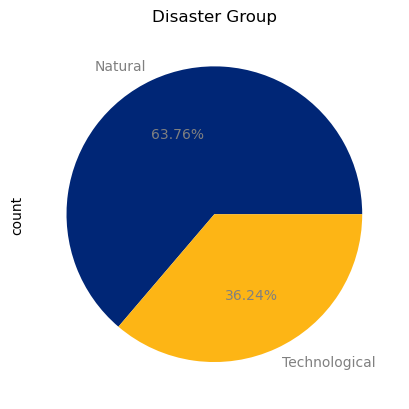

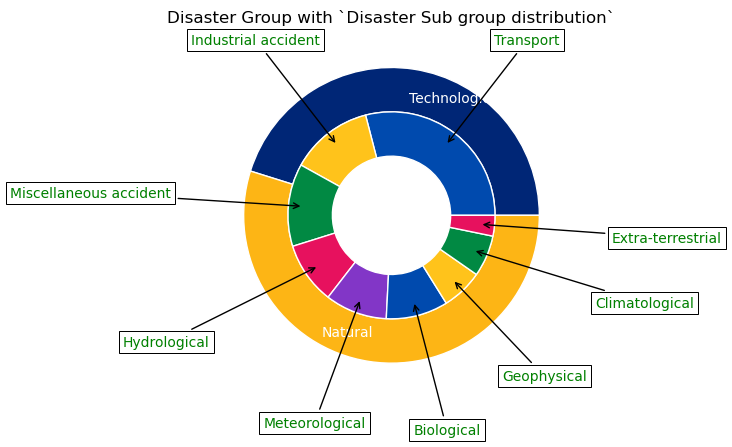

In [57]:
# Extract columns that are only relevant here for the plot
disaster_df = data[["DisasterGroup","DisasterSubgroup","DisasterType","DisasterSubtype"]]
# Plot Disaster Group for high level understanding 
disaster_df['DisasterGroup'].value_counts().plot.pie(autopct="%.2f%%", colors=berkeley_palette_primary,textprops={'color':'grey'},title='Disaster Group')

#Plot next level group for better understanding 
disastertype_df = pd.DataFrame(disaster_df.groupby(['DisasterGroup','DisasterSubgroup'])['DisasterType'].value_counts())
disastertype_df = disastertype_df.reset_index().sort_values(['DisasterGroup','count'],ascending=False) 
print(f"The Count of Data by its Disaster Type world wide from {diaster_start_year} to {diaster_end_year}")
disastertype_df
"""Code References:
1.https://stackoverflow.com/questions/67023749/how-can-i-draw-arrows-around-matplotlib-pie-to-point-each-label-to-their-respect
2.https://stackoverflow.com/questions/64795409/nested-pie-chart-from-dataframe
3.https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotate_transform.html#sphx-glr-gallery-text-labels-and-annotations-annotate-transform-py
"""
#df.groupby(['DisasterGroup'])['DisasterSubgroup'].value_counts()
size = 0.3
fig, ax = plt.subplots()
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
ax.pie(disastertype_df.groupby('DisasterGroup')['DisasterSubgroup'].count(), radius=1, labeldistance = 0.8,
       wedgeprops=dict(width=size, edgecolor='w'),colors=berkeley_palette_primary,textprops={'color':"w"},labels=disastertype_df['DisasterGroup'].unique())

wedges, texts = ax.pie(disastertype_df['DisasterSubgroup'].value_counts(), radius=1-size, pctdistance=1.1,labeldistance = 1.5,
       wedgeprops=dict(width=size, edgecolor='w'),colors=berkeley_palette_alternative_medium,textprops={'color':"#808080"})

# = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-40)
labels=disastertype_df['DisasterSubgroup'].unique()
#kw = dict(arrowprops=dict(arrowstyle="simple",color="0.9"), va="center")
bbox = dict(boxstyle="round", fc="0.8",color="y")
arrowprops = dict(
    arrowstyle="->")
#arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90,rad=10")
kw = dict(arrowprops=arrowprops, va="center",bbox=bbox_props,color="g")
for p, label in zip(wedges, labels):
    ang = np.deg2rad((p.theta1 + p.theta2)/2)
    y = np.sin(ang)
    x = np.cos(ang)
    horizontalalignment = "center" if abs(x) < abs(y) else "right" if x < 0 else "left"
    ax.annotate(label, xy=(0.6*x, 0.6*y), xytext=(1.5*x, 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
#plt.tight_layout()
#plt.show()
ax.set(aspect="equal", title='Disaster Group with `Disaster Sub group distribution`')
#ax.annotate(xytext=(5,5))
#plt.show()
pass

Lowest Natural Disaster group are :
 ['Turkmenistan' 'Qatar' 'Wallis and Futuna Islands' 'Liechtenstein'
 'Saint Barthélemy' 'Anguilla' 'Montserrat' 'Saint Helena' 'Isle of Man'
 'Saint Martin (French Part)' 'Sint Maarten (Dutch part)' 'Kuwait'
 'Bermuda' 'Tokelau' 'Niue' 'British Virgin Islands'
 'China, Macao Special Administrative Region' 'Equatorial Guinea'
 'Singapore' 'Saint Kitts and Nevis' 'French Guiana' 'French Polynesia'
 'Malta' 'United States Virgin Islands' 'Finland' 'New Caledonia'
 'United Arab Emirates' 'Libya' 'Sao Tome and Principe'
 'Antigua and Barbuda' 'Kiribati' 'Eritrea' 'Cook Islands' 'Suriname'
 'Tuvalu' 'American Samoa' 'Guadeloupe' 'Martinique'
 'Turks and Caicos Islands' 'Grenada' 'Guam' 'Northern Mariana Islands'
 'Iceland' 'Dominica' 'Palau' 'Trinidad and Tobago' 'Estonia' 'Seychelles'
 'Luxembourg' 'Maldives']


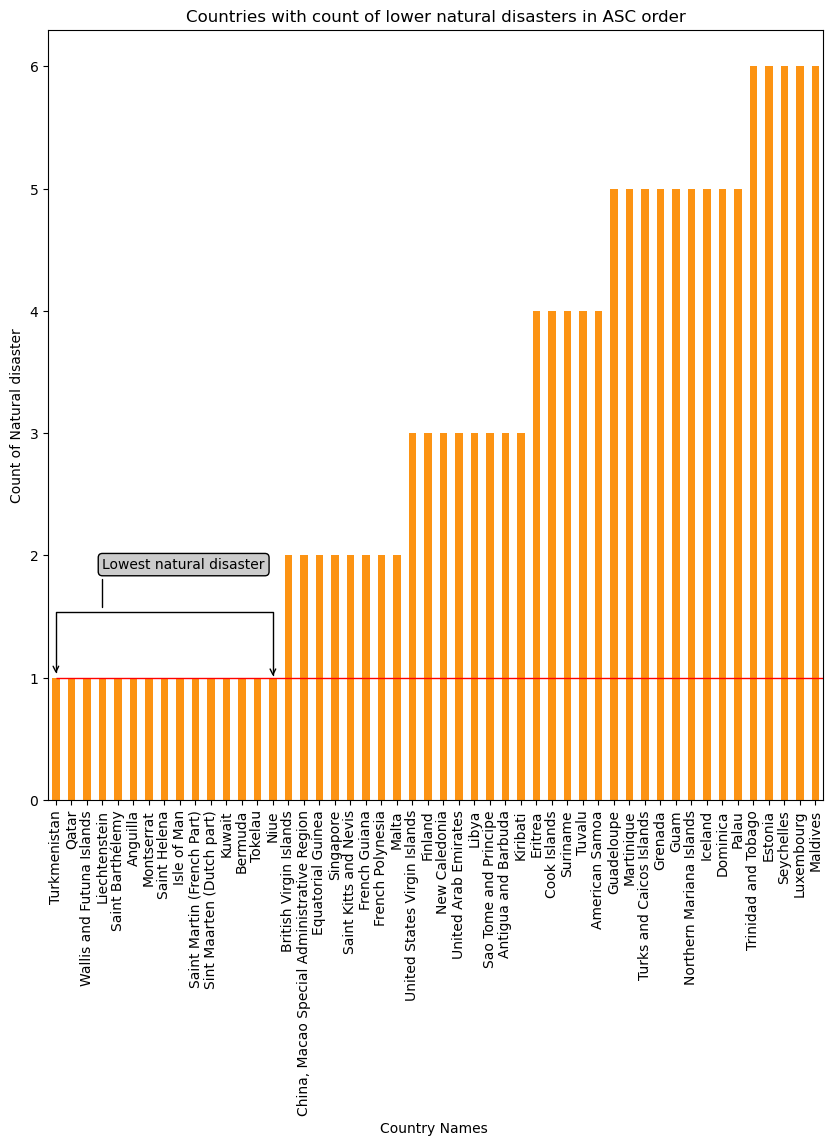

In [58]:
#1.Which regions, both in the U.S. and globally, emerge as the most resilient and desirable places to live in the context of natural disaster risks?
lowest_count_diaster_group = data_natural.groupby(['Country'])['Country'].value_counts().sort_values(ascending=True)
lowest_count_diaster =lowest_count_diaster_group.values[0]
# shows the least occurence of natural disaster is 1. lets filter out all the countries with this no of disater
print("Lowest Natural Disaster group are :\n",lowest_count_diaster_group[:50].index.values)

lowest_count_diaster_group[lowest_count_diaster_group == lowest_count_diaster].index
ax = lowest_count_diaster_group[:50].plot(kind='bar',figsize=(10,10),color=berkeley_palette_preferred_dark[1],title="Countries with count of lower natural disasters in ASC order")
ax.hlines(y=1, xmin=0, xmax=75, linewidth=1, color='red')
ax.set_xlabel("Country Names ")
ax.set_ylabel("Count of Natural disaster")
#ax.annotate('lowest natural disaster', xy=(2, 1), xytext=(3, 1.5),
#            arrowprops=dict(facecolor='black', shrink=0.010),
#            )

# You can pass an empty string to get only annotation arrows rendered
ax.annotate('', xy=(0, 1), xycoords='data',
            xytext=(14, 1), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="bar",
                            ec="k",
                            shrinkA=1, shrinkB=3))
ax.annotate(
    'Lowest natural disaster',
    xy=(3., 1.55), xycoords='data',
    xytext=(0, 30), textcoords='offset points',
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="-",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
pass

In [59]:
data_usa = data[data.Country == 'United States of America'].reset_index(drop=True)
locations=list(data_usa['Location'])
locations[:10] # Check what kind of location exists 

['Crittenden, Daviess, Webster districts (Kentucky province)',
 'Pacifique (au large de la Californie)',
 'Bullock, Montgomery districts (Alabama province), Colquitt, Grady, Mitchell, Thomas, Tift districts (Georgia province), Washington district (Floride province), Lonoke, Prairie, Saline districts (Arkansas province)',
 'Kentucky, Ohio provinces',
 'Gainesville, Alachua areas (Alachua district, Florida province), Lafayette, Gulf districts (Florida province)',
 'Fort Worth Texas city (Tarrant district, Texas province), Reagan, Burleson districts (Texas province)',
 'Franklin, Jefferson districts (Missouri province)',
 'Los Alamos, Rio Arriba, Sandoval, Santa Fe districts (New Mexico province)',
 'Near Wilkes-Barre (Pennsylvania)',
 'Concord (North Carolina)']

In [60]:
# Supporting Function to Clean Location column 
def extract_state(x):
    if "(" in x:
        #x = x.replace(";",",")
        return re.findall(r'\((.*?)\)', x)
    if "," in x:
        #print("data with ,",x.split(","))
        return x.split(",")
    return [x]

# This line is if the location contains valid state. no need to continue further.
def segregate_state(x):
    x = re.sub(r'\s+s$', '', x) # Remove location with ' s' added to the valid state
    x = x.strip() # Remove extra spaces 
    x = re.sub(r'\s+and\s+', ',', x) # replace states that has 'and' with ','
    x = re.sub(r' near ', '', x) # remove state with near keyword
    x = re.sub(r'^.*?,\s*', '', x) # Regex to remove everything to the left of the comma
    
    if x in us_state_correction.keys():
        x = us_state_correction[x] # Check if the state is valid
    x_state = us.states.lookup(x).__str__()
    if not x_state == 'None':
        return x_state.capitalize().strip()
    else:
        # Find words that contain the substring
        x_state = [st for st in us_states_abbr.keys() if  st.lower() in x]
        if len(x_state) > 0:
            return x_state
        else:
            return x # if not valid return as-is
        
    

Cleaning Location records and replacing with valid US state

In [61]:
# Fix the following :
# We have some states in brackets '()'
# the state name is attached with text 'province' 
# The state name is attached with text 'state'
# Some location column has more than one state combined in one row. We will duplicate those rows and add rows for each state in seperate rows
# We will also fix letter cases.The capitalize() method returns a string where the first character is upper case, and the rest is lower case.

#data_usa = data[data.Country == 'United States of America'].reset_index(drop=True)
data_usa['Location'] = data_usa['Location'].fillna("")
#locations=list(data_usa['Location'])
pattern = '|'.join(['province', 'provinces','state','State','nan'])
# Extract text inside parent heses and split by ';'
data_usa['Location'] = data_usa['Location'].str.replace(pattern, '', regex=True)
data_usa['Location'] = data_usa['Location'].str.replace(',\s+', ',', regex=True)
#data_usa['Location'] =data_usa['Location'].replace(";",",",regex=True)
#data['Extracted'] = data['Location'].apply(lambda x: re.findall(r'\((.*?)\)', x))
data_usa['ExtractedState'] = data_usa['Location'].apply(extract_state)
#print("???",data_usa['ExtractedState'])
# Create a new DataFrame by stacking the split elements into new rows
#exploded_df = pd.concat([pd.DataFrame({'Location': data.loc[idx, 'Location'], 'Extracted': item}, index=[idx]) 
#                         for idx, items in data['Extracted'].items() 
#                         for item in items]).reset_index(drop=True)
# Explode the extracted list into multiple rows
data_usa_exploded = data_usa.explode('ExtractedState').reset_index(drop=True)
data_usa_exploded['ExtractedState'].values


array(['Kentucky ', 'au large de la Californie', 'Alabama ', ...,
       'Kentucly and Virginia', 'Florida ',
       'Chaves county,Eastern New Mexico'], dtype=object)

In [62]:
data_usa_exploded['ExtractedState'] = data_usa_exploded['ExtractedState'].apply(segregate_state)

#Cleaning the rows with Location as Nan 
# REferences :https://stackoverflow.com/questions/73285289/remove-rows-in-dataframe-only-if-a-certain-condition-is-met-using-pandas
#data_usa_exploded.drop(data_usa_exploded[data_usa_exploded["Location"].isna()].index,inplace=True)
data_usa_exploded['ExtractedState'].dropna(axis=0,inplace=True) # aqbove one is more efficient 

data_usa_exploded.reset_index(drop=True)
data_usa_exploded["ExtractedState"] = data_usa_exploded["ExtractedState"].str.capitalize()   
       
data_usa_natural_explode = data_usa_exploded[data_usa_exploded['DisasterGroup'] == 'Natural']

#data_usa_natural_explode.reset_index(drop=True,inplace=True)
data_usa_natural_explode['ExtractedState']

0                 Kentucky
2                  Alabama
3                  Georgia
4                  Florida
5                 Arkansas
               ...        
3234        South carolina
3235             Tennessee
3236              Virginia
3237               Florida
3238    Eastern new mexico
Name: ExtractedState, Length: 3134, dtype: object

In [63]:
# Remove the Location not in Valid US State 
data_usa_natural_explode.reset_index(drop=True,inplace=True)
data_usa_natural_explode_us_state = data_usa_natural_explode[data_usa_natural_explode['ExtractedState'].isin(us_state_names)]

data_usa_natural_explode_us_state

,DisNo,ClassificationKey,DisasterGroup,DisasterSubgroup,DisasterType,DisasterSubtype,ExternalIDs,EventName,ISO,Country,...,InsuredDamage_000USD,"InsuredDamage,Adjusted_000USD",TotalDamage_000USD,"TotalDamage,Adjusted_000USD",CPI,AdminUnits,EntryDate,LastUpdate,Continent,ExtractedState
0,2000-0021-USA,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,United States of America,...,200500.0,354778.0,210000.0,371587.0,56.514291,"[{""adm2_code"":29698,""adm2_name"":""Crittenden""},...",2003-07-01,2023-09-25,North America,Kentucky
1,2000-0067-USA,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,United States of America,...,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":28696,""adm2_name"":""Bullock""},{""a...",2005-04-24,2023-09-25,North America,Alabama
2,2000-0067-USA,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,United States of America,...,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":28696,""adm2_name"":""Bullock""},{""a...",2005-04-24,2023-09-25,North America,Georgia
3,2000-0067-USA,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,United States of America,...,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":28696,""adm2_name"":""Bullock""},{""a...",2005-04-24,2023-09-25,North America,Florida
4,2000-0067-USA,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,United States of America,...,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":28696,""adm2_name"":""Bullock""},{""a...",2005-04-24,2023-09-25,North America,Arkansas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,2024-0693-USA,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Helene',USA,United States of America,...,NaN,NaN,55000000.0,NaN,NaN,NaN,2024-09-30,2024-10-29,North America,Florida
3127,2024-0693-USA,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Helene',USA,United States of America,...,NaN,NaN,55000000.0,NaN,NaN,NaN,2024-09-30,2024-10-29,North America,Georgia
3130,2024-0693-USA,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Helene',USA,United States of America,...,NaN,NaN,55000000.0,NaN,NaN,NaN,2024-09-30,2024-10-29,North America,Tennessee
3131,2024-0693-USA,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Helene',USA,United States of America,...,NaN,NaN,55000000.0,NaN,NaN,NaN,2024-09-30,2024-10-29,North America,Virginia


In [64]:
#1.Which regions,  in the U.S.  emerge as the most resilient and desirable places to live in the context of natural disaster risks?

lowest_count_diaster_group_usa = data_usa_natural_explode_us_state.groupby(['ExtractedState'])['ExtractedState'].value_counts().sort_values(ascending=True)
lowest_count_diaster =lowest_count_diaster_group_usa.values[0]
lowest_disaster_state = lowest_count_diaster_group_usa[lowest_count_diaster_group_usa == lowest_count_diaster].index

for lw in lowest_disaster_state:
    if lw in us_states_abbr.keys():
        print("States with lower natural diaster in usa",lw)
lowest_count_diaster_group_usa
lowest_count_diaster_group_usa



States with lower natural diaster in usa Alaska


ExtractedState
Alaska             5
Utah               8
Hawaii            10
Idaho             10
Nevada            15
Oregon            22
Arizona           23
Delaware          23
Montana           24
Wyoming           26
Washington        27
Vermont           29
Maine             33
Connecticut       39
Massachusetts     49
Maryland          53
Michigan          55
Minnesota         59
Colorado          60
Wisconsin         61
Indiana           65
Virginia          73
Nebraska          74
Florida           74
Iowa              75
Ohio              75
Pennsylvania      79
Georgia           80
Arkansas          81
Kentucky          81
Alabama           82
Louisiana         83
Tennessee         84
California        88
Kansas            92
Mississippi       94
Illinois          98
Missouri         115
Oklahoma         116
Texas            173
Name: count, dtype: int64

Top 10 Lowest Natural Disaster group in USA are :
 ['Alaska' 'Utah' 'Hawaii' 'Idaho' 'Nevada' 'Oregon' 'Arizona' 'Delaware'
 'Montana' 'Wyoming']


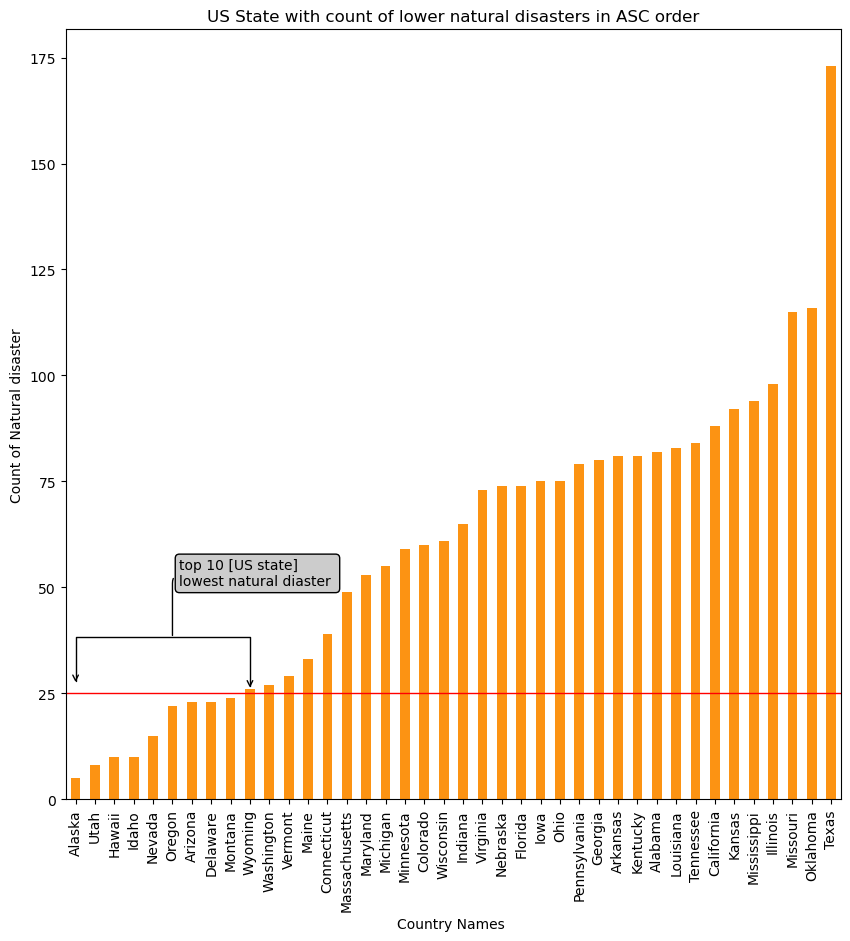

In [65]:
# shows the least occurence of natural disaster is 1. lets filter out all the countries with this no of disater
print("Top 10 Lowest Natural Disaster group in USA are :\n",lowest_count_diaster_group_usa[:10].index.values)

lowest_count_diaster_group_usa[lowest_count_diaster_group_usa == lowest_count_diaster].index
ax = lowest_count_diaster_group_usa[:50].plot(kind='bar',figsize=(10,10),color=berkeley_palette_preferred_dark[1],title="US State with count of lower natural disasters in ASC order")
ax.hlines(y=25, xmin=-1, xmax=75, linewidth=1, color='red')
ax.set_xlabel("Country Names ")
ax.set_ylabel("Count of Natural disaster")
#ax.annotate('lowest natural disaster', xy=(2, 1), xytext=(3, 1.5),
#            arrowprops=dict(facecolor='black', shrink=0.010),
#            )
y_offset = 16
# You can pass an empty string to get only annotation arrows rendered
ax.annotate('', xy=(0,10+y_offset), xycoords='data',
            xytext=(9, 10+y_offset), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="bar",
                            ec="k",
                            shrinkA=1, shrinkB=5))
ax.annotate(
    'top 10 [US state] \nlowest natural diaster ',
    xy=(5,38), xycoords='data',
    xytext=(5, 38), textcoords='offset points',
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="-",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
pass

3.What are the global patterns in natural and technological disasters, comparing across countries, continents, and U.S. states? 


In [66]:
"""# Example: World Map of Disasters by Country
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Aggregate disaster counts by country
disaster_counts = df.groupby('Country').size().reset_index(name='Disaster Count')

# Merge disaster counts with GeoPandas world map
world = world.merge(disaster_counts, how='left', left_on='name', right_on='Country')

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Disaster Count', ax=ax, legend=True, cmap='Reds', missing_kwds={'color': 'lightgrey'})
plt.title('Global Distribution of Disasters by Country', fontsize=16)
plt.show()"""

"# Example: World Map of Disasters by Country\nworld = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))\n\n# Aggregate disaster counts by country\ndisaster_counts = df.groupby('Country').size().reset_index(name='Disaster Count')\n\n# Merge disaster counts with GeoPandas world map\nworld = world.merge(disaster_counts, how='left', left_on='name', right_on='Country')\n\n# Plot the choropleth map\nfig, ax = plt.subplots(figsize=(15, 10))\nworld.boundary.plot(ax=ax, linewidth=1)\nworld.plot(column='Disaster Count', ax=ax, legend=True, cmap='Reds', missing_kwds={'color': 'lightgrey'})\nplt.title('Global Distribution of Disasters by Country', fontsize=16)\nplt.show()"

In [67]:
"""

# Load disaster data
# Replace with your actual dataset path
disaster_data = pd.read_csv('emdat_data.csv')  # Adjust filename and column names
disaster_counts = disaster_data.groupby('Country').size().reset_index(name='Disaster Count')


# Initialize the map
fig, ax = plt.subplots(figsize=(15, 10))
m = Basemap(projection='merc', resolution='c', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, ax=ax)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Map disaster counts to each country
country_shapes = m.readshapefile('path_to_shapefile', 'countries', drawbounds=False)
country_data = {country['NAME']: country for country in m.countries_info}

# Merge disaster data with country shapes
patches = []
colors = []
for country_name, country in country_data.items():
    if country_name in disaster_counts['Country'].values:
        disaster_count = disaster_counts.loc[disaster_counts['Country'] == country_name, 'Disaster Count'].values[0]
        color = sns.color_palette("Reds", as_cmap=True)(Normalize()(disaster_count))
    else:
        color = 'lightgrey'
    
    patches.append(Polygon(np.array(country['SHAPE']), closed=True))
    colors.append(color)

# Add a PatchCollection for choropleth
collection = PatchCollection(patches, facecolor=colors, edgecolor='k', linewidth=0.5)
ax.add_collection(collection)

# Add a legend
sm = plt.cm.ScalarMappable(cmap="Reds", norm=Normalize(vmin=disaster_counts['Disaster Count'].min(), vmax=disaster_counts['Disaster Count'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", pad=0.05)
cbar.set_label("Number of Disasters", fontsize=12)

plt.title("Global Distribution of Disasters by Country", fontsize=16)
plt.show()
"""

'\n\n# Load disaster data\n# Replace with your actual dataset path\ndisaster_data = pd.read_csv(\'emdat_data.csv\')  # Adjust filename and column names\ndisaster_counts = disaster_data.groupby(\'Country\').size().reset_index(name=\'Disaster Count\')\n\n\n# Initialize the map\nfig, ax = plt.subplots(figsize=(15, 10))\nm = Basemap(projection=\'merc\', resolution=\'c\', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, ax=ax)\n\n# Draw coastlines and countries\nm.drawcoastlines()\nm.drawcountries()\n\n# Map disaster counts to each country\ncountry_shapes = m.readshapefile(\'path_to_shapefile\', \'countries\', drawbounds=False)\ncountry_data = {country[\'NAME\']: country for country in m.countries_info}\n\n# Merge disaster data with country shapes\npatches = []\ncolors = []\nfor country_name, country in country_data.items():\n    if country_name in disaster_counts[\'Country\'].values:\n        disaster_count = disaster_counts.loc[disaster_counts[\'Country\'] == country_name, \'Di

In [68]:
data.columns

Index(['DisNo', 'ClassificationKey', 'DisasterGroup', 'DisasterSubgroup',
       'DisasterType', 'DisasterSubtype', 'ExternalIDs', 'EventName', 'ISO',
       'Country', 'Subregion', 'Region', 'Location', 'Origin',
       'AssociatedTypes', 'OFDABHAResponse', 'Appeal', 'Declaration',
       'AIDContribution_000USD', 'Magnitude', 'MagnitudeScale', 'Latitude',
       'Longitude', 'RiverBasin', 'StartYear', 'StartMonth', 'StartDay',
       'EndYear', 'EndMonth', 'EndDay', 'TotalDeaths', 'NoInjured',
       'NoAffected', 'NoHomeless', 'TotalAffected',
       'ReconstructionCosts_000USD', 'ReconstructionCosts,Adjusted_000USD',
       'InsuredDamage_000USD', 'InsuredDamage,Adjusted_000USD',
       'TotalDamage_000USD', 'TotalDamage,Adjusted_000USD', 'CPI',
       'AdminUnits', 'EntryDate', 'LastUpdate', 'Continent'],
      dtype='object')

2. Trends in Disaster Frequency Over Time (Line Chart)

/var/folders/gj/bbgjz4_x5ybc58ms5zv9p8sr0000gp/T/ipykernel_967/249503418.py:8: UserWarning: 
The palette list has fewer values (20) than needed (217) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=yearly_disasters, x='StartYear', y='Disaster Count', hue='Country', marker='o',palette=berkeley_palette_all)


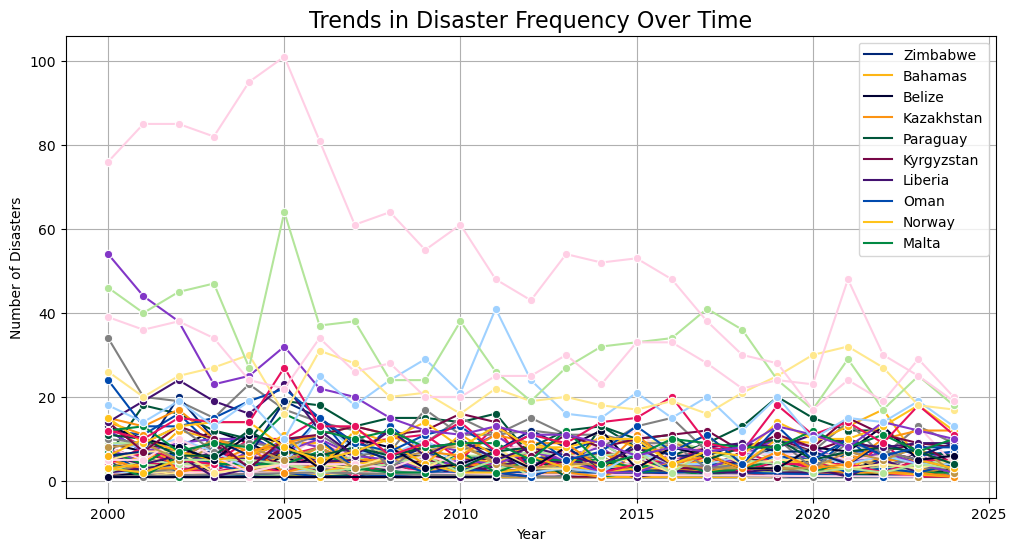

In [69]:
import seaborn as sns

# Aggregate disaster counts by year
yearly_disasters = data.groupby(['StartYear', 'Country']).size().reset_index(name='Disaster Count').sort_values(by='Disaster Count')

# Plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=yearly_disasters, x='StartYear', y='Disaster Count', hue='Country', marker='o',palette=berkeley_palette_all)
plt.title('Trends in Disaster Frequency Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
h,l = ax.get_legend_handles_labels()
plt.legend(h[:10], l[:10])   # <<<<<<<< This is where the magic happens
#plt.legend(title='Country',loc="lower left", ncol=len(data.columns))
plt.grid(True)
plt.show()
pass

3. Bar Chart Comparing Disasters Across Countries

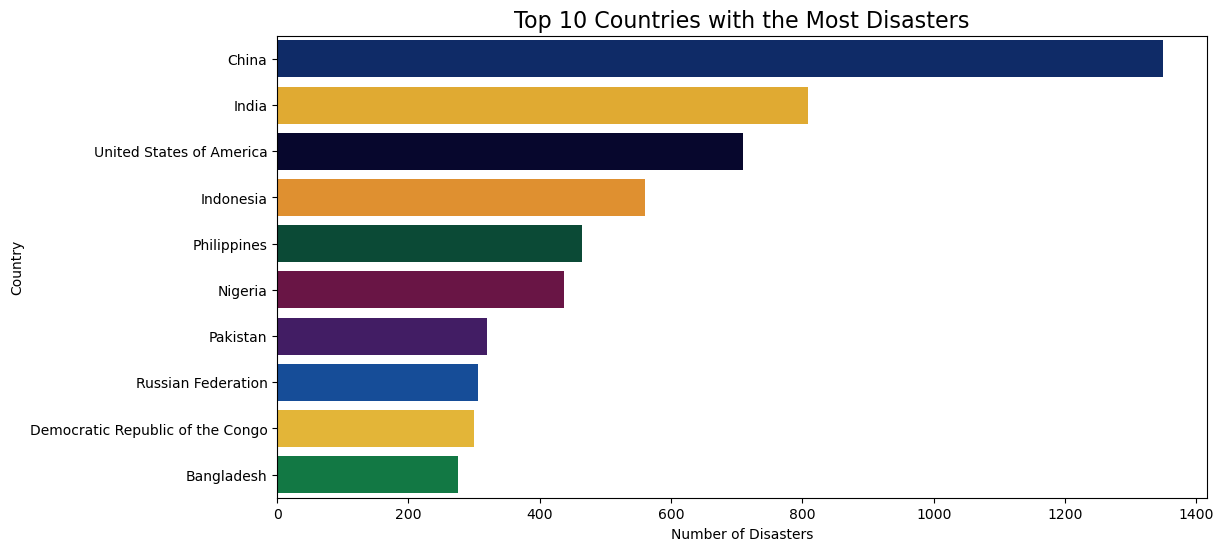

In [70]:
# Aggregate disaster counts by country
top_countries = data['Country'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Disaster Count']

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Disaster Count', y='Country', palette=berkeley_palette_all)
plt.title('Top 10 Countries with the Most Disasters', fontsize=16)
plt.xlabel('Number of Disasters')
plt.ylabel('Country')
plt.show()

4. Heatmap of Disaster Frequency by Month and Year

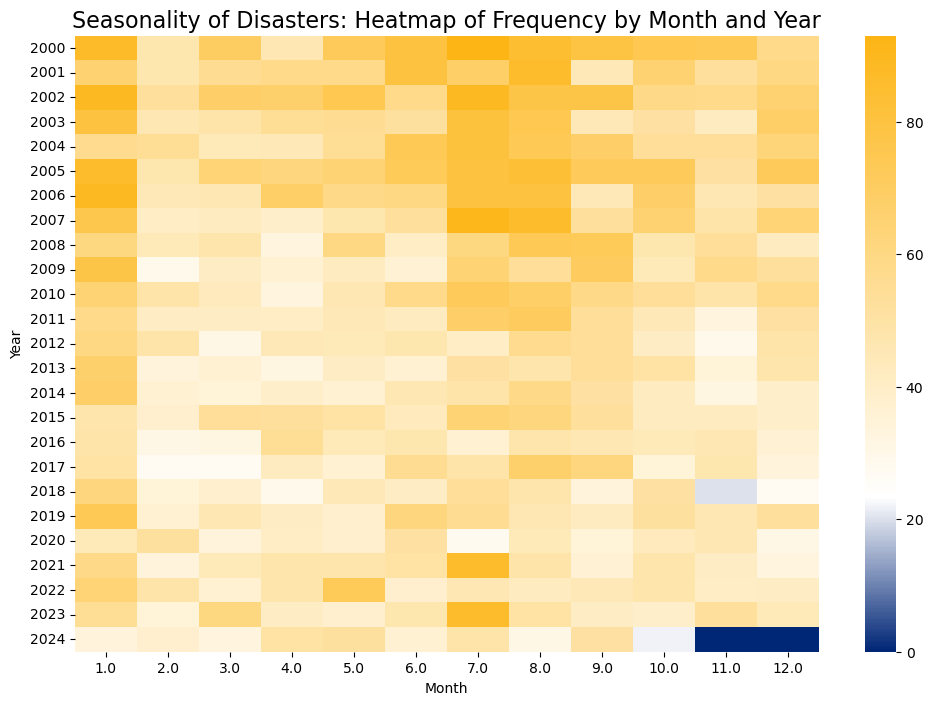

In [71]:
# Reference : https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
# Convert disaster dates into a datetime object and extract month/year
# Columns to consider : 'StartYear', 'StartMonth', 'StartDay'
#df['Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
#df['Year'] = data['Date'].dt.year
#df['Month'] = df['Date'].dt.month
#'StartYear', 'StartMonth', 'StartDay'
# Aggregate disaster counts by year and month
heatmap_data = data.groupby(['StartYear', 'StartMonth']).size().unstack(fill_value=0)

# Plot using Seaborn
plt.figure(figsize=(12, 8))

import matplotlib.colors
# Create your own color map using Berkeley color pallette
cvals  = [-2., -1, 2]
colors = [berkeley_palette_primary[0],"white",berkeley_palette_primary[1]]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
sns.heatmap(heatmap_data, cmap=cmap, annot=False, cbar=True)
plt.title('Seasonality of Disasters: Heatmap of Frequency by Month and Year', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Pattern for US states 

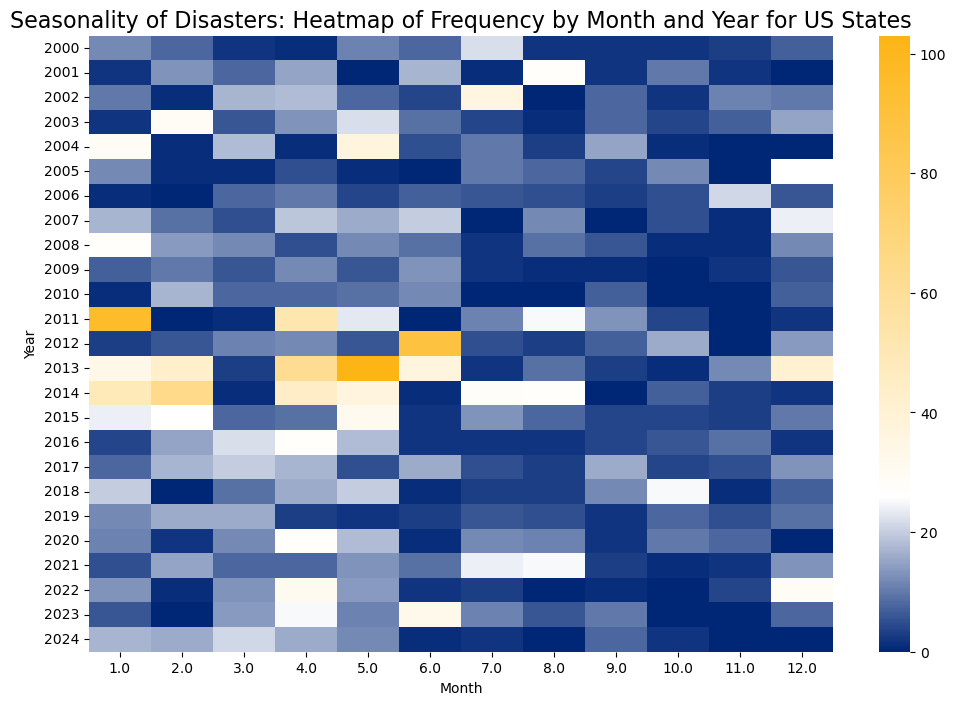

In [72]:
heatmap_data = data_usa_exploded.groupby(['StartYear', 'StartMonth']).size().unstack(fill_value=0)

# Plot using Seaborn
plt.figure(figsize=(12, 8))

import matplotlib.colors
# Create your own color map using Berkeley color pallette
cvals  = [-2., -1, 2]
colors = [berkeley_palette_primary[0],"white",berkeley_palette_primary[1]]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
sns.heatmap(heatmap_data, cmap=cmap, annot=False, cbar=True)
plt.title('Seasonality of Disasters: Heatmap of Frequency by Month and Year for US States', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [73]:
data.columns

Index(['DisNo', 'ClassificationKey', 'DisasterGroup', 'DisasterSubgroup',
       'DisasterType', 'DisasterSubtype', 'ExternalIDs', 'EventName', 'ISO',
       'Country', 'Subregion', 'Region', 'Location', 'Origin',
       'AssociatedTypes', 'OFDABHAResponse', 'Appeal', 'Declaration',
       'AIDContribution_000USD', 'Magnitude', 'MagnitudeScale', 'Latitude',
       'Longitude', 'RiverBasin', 'StartYear', 'StartMonth', 'StartDay',
       'EndYear', 'EndMonth', 'EndDay', 'TotalDeaths', 'NoInjured',
       'NoAffected', 'NoHomeless', 'TotalAffected',
       'ReconstructionCosts_000USD', 'ReconstructionCosts,Adjusted_000USD',
       'InsuredDamage_000USD', 'InsuredDamage,Adjusted_000USD',
       'TotalDamage_000USD', 'TotalDamage,Adjusted_000USD', 'CPI',
       'AdminUnits', 'EntryDate', 'LastUpdate', 'Continent'],
      dtype='object')

In [74]:
data.columns


Index(['DisNo', 'ClassificationKey', 'DisasterGroup', 'DisasterSubgroup',
       'DisasterType', 'DisasterSubtype', 'ExternalIDs', 'EventName', 'ISO',
       'Country', 'Subregion', 'Region', 'Location', 'Origin',
       'AssociatedTypes', 'OFDABHAResponse', 'Appeal', 'Declaration',
       'AIDContribution_000USD', 'Magnitude', 'MagnitudeScale', 'Latitude',
       'Longitude', 'RiverBasin', 'StartYear', 'StartMonth', 'StartDay',
       'EndYear', 'EndMonth', 'EndDay', 'TotalDeaths', 'NoInjured',
       'NoAffected', 'NoHomeless', 'TotalAffected',
       'ReconstructionCosts_000USD', 'ReconstructionCosts,Adjusted_000USD',
       'InsuredDamage_000USD', 'InsuredDamage,Adjusted_000USD',
       'TotalDamage_000USD', 'TotalDamage,Adjusted_000USD', 'CPI',
       'AdminUnits', 'EntryDate', 'LastUpdate', 'Continent'],
      dtype='object')

In [90]:
data.head(5)
data.columns

Index(['DisNo', 'ClassificationKey', 'DisasterGroup', 'DisasterSubgroup',
       'DisasterType', 'DisasterSubtype', 'ExternalIDs', 'EventName', 'ISO',
       'Country', 'Subregion', 'Region', 'Location', 'Origin',
       'AssociatedTypes', 'OFDABHAResponse', 'Appeal', 'Declaration',
       'AIDContribution_000USD', 'Magnitude', 'MagnitudeScale', 'Latitude',
       'Longitude', 'RiverBasin', 'StartYear', 'StartMonth', 'StartDay',
       'EndYear', 'EndMonth', 'EndDay', 'TotalDeaths', 'NoInjured',
       'NoAffected', 'NoHomeless', 'TotalAffected',
       'ReconstructionCosts_000USD', 'ReconstructionCosts,Adjusted_000USD',
       'InsuredDamage_000USD', 'InsuredDamage,Adjusted_000USD',
       'TotalDamage_000USD', 'TotalDamage,Adjusted_000USD', 'CPI',
       'AdminUnits', 'EntryDate', 'LastUpdate', 'Continent'],
      dtype='object')

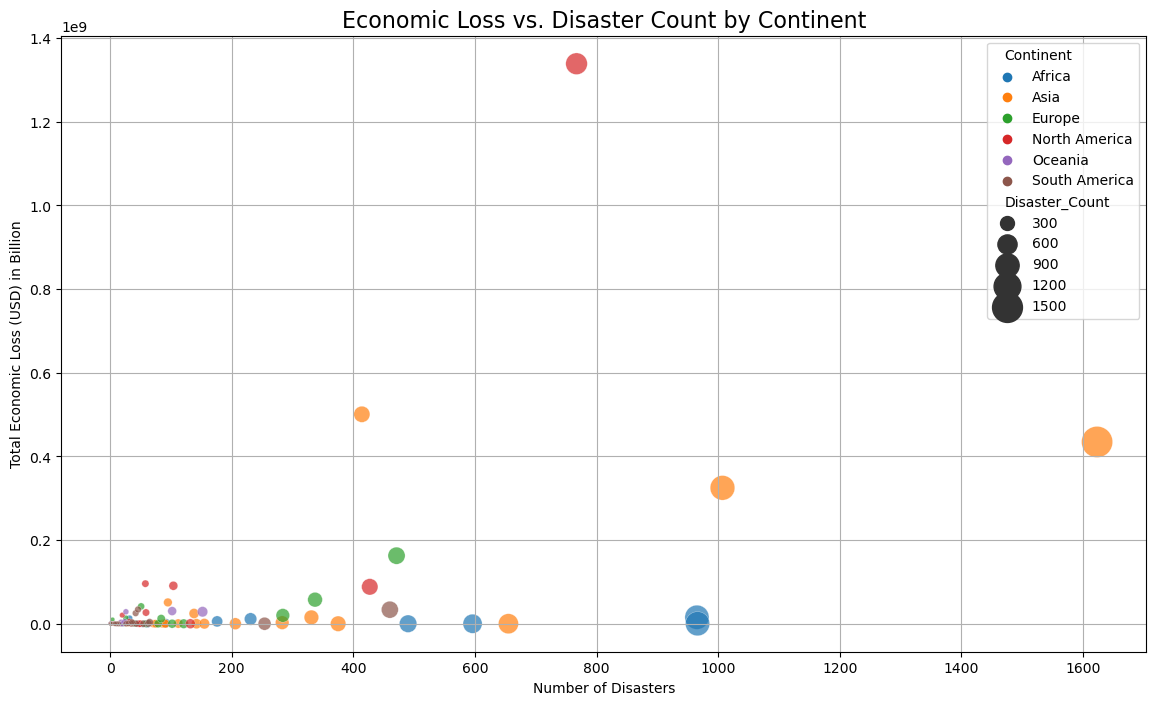

In [94]:
from matplotlib.ticker import ScalarFormatter

y_formatter = ScalarFormatter(useOffset=False)

# Aggregate disaster data by region
bubble_data = data.groupby(['Continent', 'DisasterType']).agg(
    Disaster_Count=('DisNo', 'size'),
    Economic_Loss=('TotalDamage_000USD', 'sum')
).reset_index()

# Plot using Seaborn
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(
    data=bubble_data,
    x='Disaster_Count',
    y='Economic_Loss',
   size='Disaster_Count', 
    hue='Continent',
    sizes=(10, 500),
    alpha=0.7
)
plt.title('Economic Loss vs. Disaster Count by Continent', fontsize=16)
plt.xlabel('Number of Disasters')
plt.ylabel('Total Economic Loss (USD) in Billion')
#ax.yaxis.offsetText.set_visible(False) # this turns off the y axis 1e9 text 
ax.yaxis.set_major_formatter(y_formatter)
#plt.legend(title='Continent', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()


In [ ]:
data_usa_exploded["ExtractedState"]

0                 Kentucky
1               California
2                  Alabama
3                  Georgia
4                  Florida
               ...        
3234        South carolina
3235             Tennessee
3236              Virginia
3237               Florida
3238    Eastern new mexico
Name: ExtractedState, Length: 3239, dtype: object

**How do storm patterns and trends compare globally, within the U.S., and specifically in Florida?**

In [ ]:
data_natural_storm = data_natural[data_natural.DisasterType == 'Storm'][['DisasterSubtype',
'Country',
 'Location',
 'Continent',
'StartDay',
 'StartMonth',
 'StartYear',
 'TotalDeaths',
 'EndDay',
 'EndMonth',
 'EndYear',
 'InsuredDamage_000USD',
 'ReconstructionCosts,Adjusted_000USD',
 'TotalDamage_000USD',
 'InsuredDamage,Adjusted_000USD',
 'ReconstructionCosts_000USD',
 'MagnitudeScale',
 'Magnitude',
 'TotalAffected',
 'NoAffected',
 'NoHomeless',
 'NoInjured']]
data_natural_storm.head()



,DisasterSubtype,Country,Location,Continent,StartDay,StartMonth,StartYear,TotalDeaths,EndDay,EndMonth,...,"ReconstructionCosts,Adjusted_000USD",TotalDamage_000USD,"InsuredDamage,Adjusted_000USD",ReconstructionCosts_000USD,MagnitudeScale,Magnitude,TotalAffected,NoAffected,NoHomeless,NoInjured
12,Tropical cyclone,Djibouti,NaN,Africa,20.0,5.0,2018,2.0,21.0,5.0,...,NaN,NaN,NaN,NaN,Kph,NaN,25000.0,25000.0,NaN,NaN
39,Lightning/Thunderstorms,Sudan,Khartoum province,Africa,27.0,9.0,2002,33.0,27.0,9.0,...,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,NaN
99,Severe weather,Sudan,Al Geneina district (Western Darfur province),Africa,3.0,8.0,2011,20.0,3.0,8.0,...,NaN,NaN,NaN,NaN,Kph,NaN,30.0,NaN,NaN,30.0
141,Severe weather,Sudan,Um Rakuba and Tunaydbah (East Soudan),Africa,NaN,6.0,2021,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,Kph,NaN,16000.0,16000.0,NaN,NaN
209,Tropical cyclone,Somalia,"Bandarbeyla, Caluula, Qandala, Qardho, Iskushu...",Africa,8.0,11.0,2013,162.0,19.0,11.0,...,NaN,2000.0,NaN,NaN,Kph,NaN,142380.0,142380.0,NaN,NaN


In [ ]:
data_usa_natural_explode_us_state[data_usa_natural_explode_us_state['DisasterType'] == 'Storm']
data_usa_natural_explode_us_state[['DisasterSubtype',
'Country',
 'Location',
 'Continent',
'StartDay',
 'StartMonth',
 'StartYear',
 'TotalDeaths',
 'EndDay',
 'EndMonth',
 'EndYear',
 'InsuredDamage_000USD',
 'ReconstructionCosts,Adjusted_000USD',
 'TotalDamage_000USD',
 'InsuredDamage,Adjusted_000USD',
 'ReconstructionCosts_000USD',
 'MagnitudeScale',
 'Magnitude',
 'TotalAffected',
 'NoAffected',
 'NoHomeless',
 'NoInjured']]

,DisasterSubtype,Country,Location,Continent,StartDay,StartMonth,StartYear,TotalDeaths,EndDay,EndMonth,...,"ReconstructionCosts,Adjusted_000USD",TotalDamage_000USD,"InsuredDamage,Adjusted_000USD",ReconstructionCosts_000USD,MagnitudeScale,Magnitude,TotalAffected,NoAffected,NoHomeless,NoInjured
0,Tornado,United States of America,"Crittenden,Daviess,Webster districts (Kentucky )",North America,2.0,1.0,2000,1.0,4.0,1.0,...,NaN,210000.0,354778.0,NaN,Kph,NaN,162.0,NaN,150.0,12.0
1,Tornado,United States of America,"Bullock,Montgomery districts (Alabama ),Colqui...",North America,13.0,2.0,2000,22.0,14.0,2.0,...,NaN,NaN,NaN,NaN,Kph,249.0,1000.0,900.0,NaN,100.0
2,Tornado,United States of America,"Bullock,Montgomery districts (Alabama ),Colqui...",North America,13.0,2.0,2000,22.0,14.0,2.0,...,NaN,NaN,NaN,NaN,Kph,249.0,1000.0,900.0,NaN,100.0
3,Tornado,United States of America,"Bullock,Montgomery districts (Alabama ),Colqui...",North America,13.0,2.0,2000,22.0,14.0,2.0,...,NaN,NaN,NaN,NaN,Kph,249.0,1000.0,900.0,NaN,100.0
4,Tornado,United States of America,"Bullock,Montgomery districts (Alabama ),Colqui...",North America,13.0,2.0,2000,22.0,14.0,2.0,...,NaN,NaN,NaN,NaN,Kph,249.0,1000.0,900.0,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,Tropical cyclone,United States of America,"Florida,Georgia,North Carolina,South Carolina,...",North America,25.0,9.0,2024,204.0,28.0,9.0,...,NaN,55000000.0,NaN,NaN,Kph,225.0,NaN,NaN,NaN,NaN
3127,Tropical cyclone,United States of America,"Florida,Georgia,North Carolina,South Carolina,...",North America,25.0,9.0,2024,204.0,28.0,9.0,...,NaN,55000000.0,NaN,NaN,Kph,225.0,NaN,NaN,NaN,NaN
3130,Tropical cyclone,United States of America,"Florida,Georgia,North Carolina,South Carolina,...",North America,25.0,9.0,2024,204.0,28.0,9.0,...,NaN,55000000.0,NaN,NaN,Kph,225.0,NaN,NaN,NaN,NaN
3131,Tropical cyclone,United States of America,"Florida,Georgia,North Carolina,South Carolina,...",North America,25.0,9.0,2024,204.0,28.0,9.0,...,NaN,55000000.0,NaN,NaN,Kph,225.0,NaN,NaN,NaN,NaN


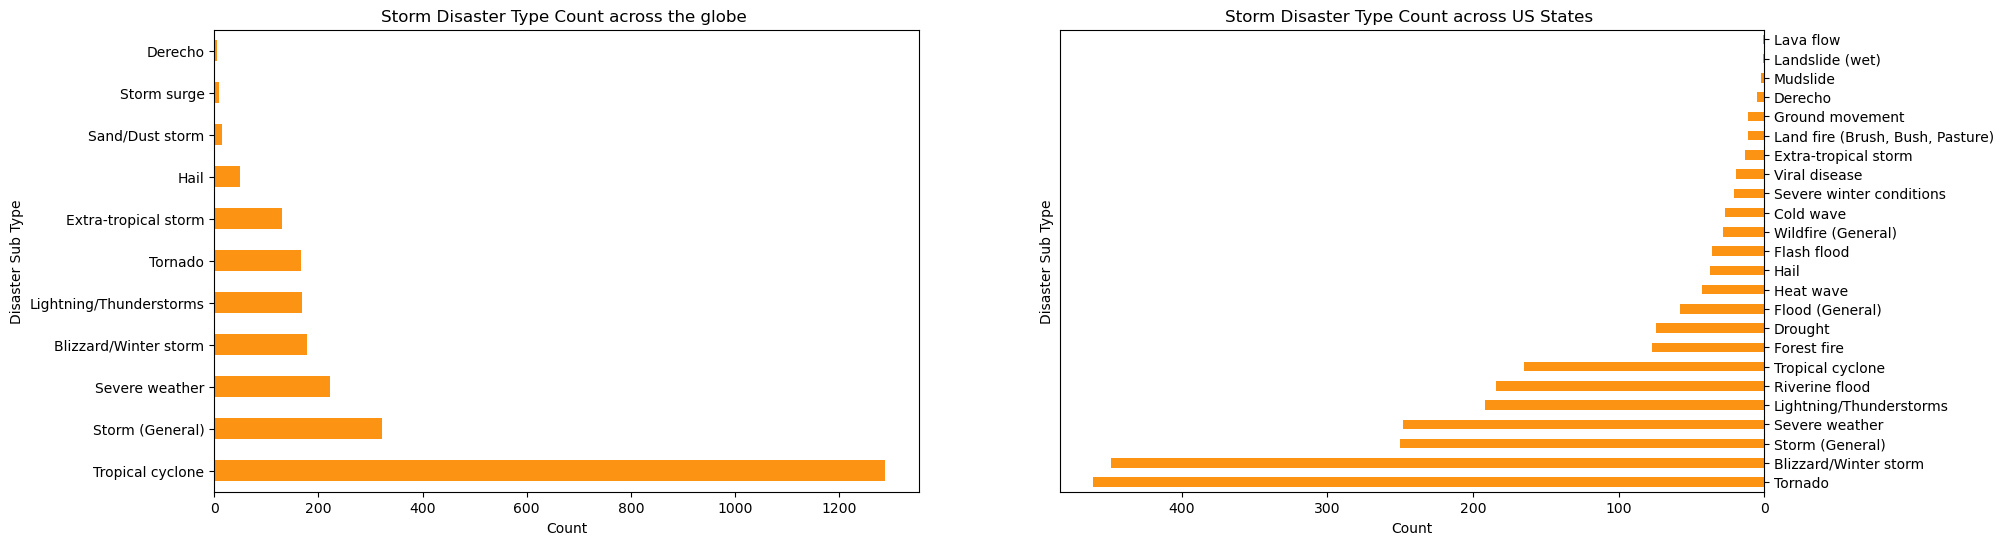

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax = data_natural_storm['DisasterSubtype'].value_counts().plot(ax=axes[0],kind='barh',title="Storm Disaster Type Count across the globe ",color=berkeley_palette_preferred_dark[1])
ax.set_ylabel("Disaster Sub Type")
ax.set_xlabel("Count")


data_usa_natural_explode_us_state['DisasterSubtype'].value_counts().plot(ax=axes[1],kind='barh',title="Storm Disaster Type Count across US States ",color=berkeley_palette_preferred_dark[1])
axes[1].set_ylabel("Disaster Sub Type")
axes[1].set_xlabel("Count")
# Rotate the right-side graph by inverting the axes
axes[1].invert_xaxis()
#axes[1].invert_yaxis()
axes[1].yaxis.tick_right()  # Move ticks to the right


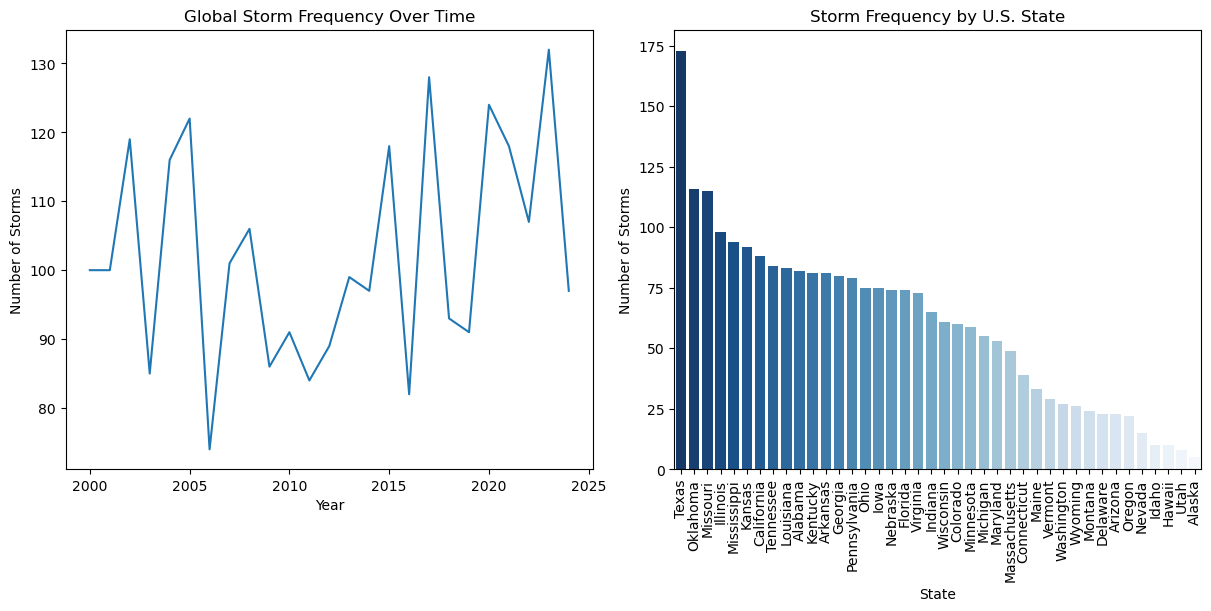

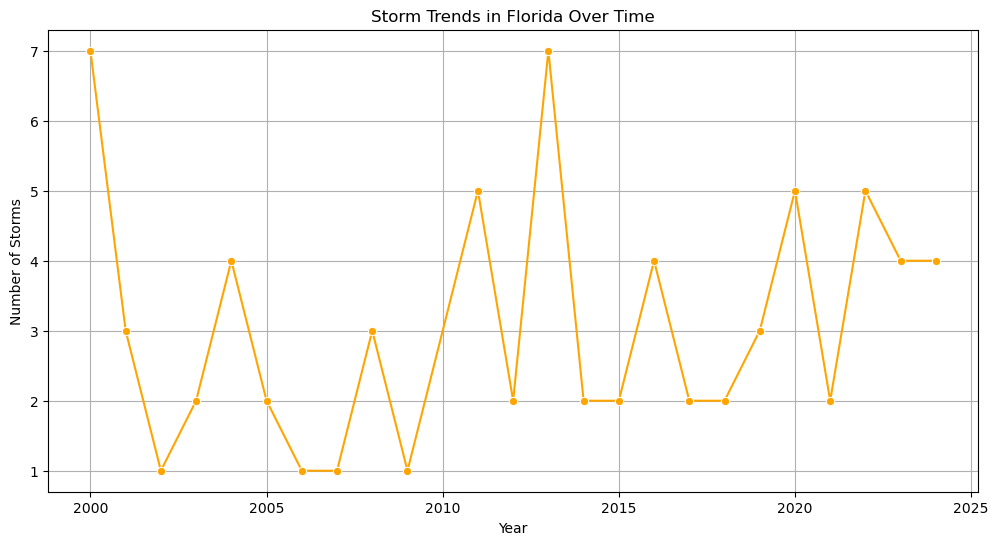

In [ ]:
# Load global storm data
fig2, axes2 = plt.subplots(nrows=1,ncols=2,figsize=(12,6),constrained_layout=True)
#data_natural_storm['StartYear'] = pd.to_datetime(data_natural_storm['Date']).dt.year
storm_counts = data_natural_storm.groupby('StartYear').size()

# Plot storm trends over time
#plt.figure(figsize=(12, 6))
sns.lineplot(x=storm_counts.index, y=storm_counts.values,ax=axes2[0])
axes2[0].set_title("Global Storm Frequency Over Time")
#plt.title("Global Storm Frequency Over Time")
axes2[0].set_xlabel("Year")

axes2[0].set_ylabel("Number of Storms")



# Load U.S. storm data

us_state_counts = data_usa_natural_explode_us_state.groupby('ExtractedState').size().sort_values(ascending=False)

# Bar plot of storm frequency by state

sns.barplot(x=us_state_counts.index, y=us_state_counts.values, palette='Blues_r',ax=axes2[1])
plt.title("Storm Frequency by U.S. State")
plt.xlabel("State")
plt.ylabel("Number of Storms")
plt.xticks(rotation=90)
plt.show()

# Subset Florida data
florida_data = data_usa_natural_explode_us_state[data_usa_natural_explode_us_state['ExtractedState'] == 'Florida']
florida_trends = florida_data.groupby('StartYear').size()

# Line plot for Florida
plt.figure(figsize=(12, 6))
sns.lineplot(x=florida_trends.index, y=florida_trends.values, marker='o', color='orange')
plt.title("Storm Trends in Florida Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Storms")
plt.grid(True)
plt.show()

In [ ]:
data_usa_natural_explode_us_state.columns

Index(['DisNo', 'ClassificationKey', 'DisasterGroup', 'DisasterSubgroup',
       'DisasterType', 'DisasterSubtype', 'ExternalIDs', 'EventName', 'ISO',
       'Country', 'Subregion', 'Region', 'Location', 'Origin',
       'AssociatedTypes', 'OFDABHAResponse', 'Appeal', 'Declaration',
       'AIDContribution_000USD', 'Magnitude', 'MagnitudeScale', 'Latitude',
       'Longitude', 'RiverBasin', 'StartYear', 'StartMonth', 'StartDay',
       'EndYear', 'EndMonth', 'EndDay', 'TotalDeaths', 'NoInjured',
       'NoAffected', 'NoHomeless', 'TotalAffected',
       'ReconstructionCosts_000USD', 'ReconstructionCosts,Adjusted_000USD',
       'InsuredDamage_000USD', 'InsuredDamage,Adjusted_000USD',
       'TotalDamage_000USD', 'TotalDamage,Adjusted_000USD', 'CPI',
       'AdminUnits', 'EntryDate', 'LastUpdate', 'Continent', 'ExtractedState'],
      dtype='object')

5.During which time of year do storms most frequently impact Florida and the southeastern U.S. coast?


/var/folders/gj/bbgjz4_x5ybc58ms5zv9p8sr0000gp/T/ipykernel_967/3544150593.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Season'] = filtered_data['StartMonth'].apply(


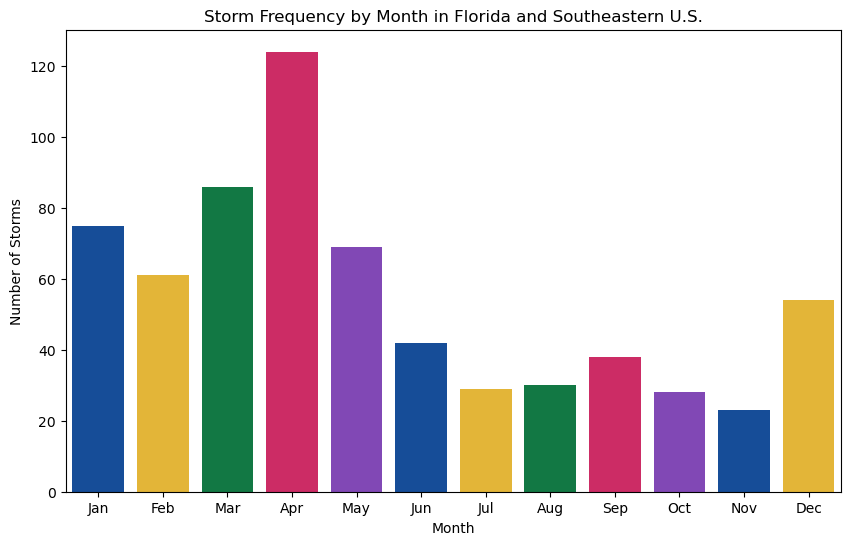

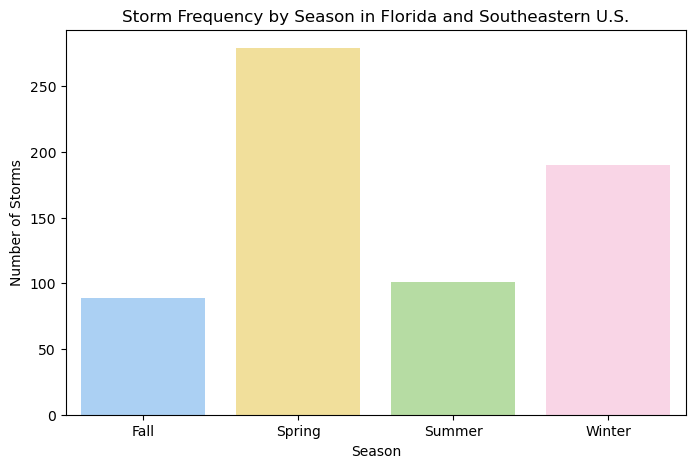

In [ ]:
# Example storm data (replace with actual dataset)
data = pd.DataFrame({
    'Date': pd.date_range(start='2000-01-01', periods=200, freq='M'),
    'State': ['Florida', 'Georgia', 'South Carolina', 'Florida', 'North Carolina'] * 40,
    'Storm_Type': ['Hurricane', 'Tropical Storm', 'Tornado', 'Hurricane', 'Thunderstorm'] * 40
})

# Filter data for southeastern states
southeastern_states = ['Alabama','Arkansas','Florida', 'Georgia','Kentucky', 'Louisiana', 'Mississippi','South Carolina', 'North Carolina','Tennessee','Puerto Rico','U.S. Virgin Islands']

filtered_data = data_usa_natural_explode_us_state[data_usa_natural_explode_us_state['ExtractedState'].isin(southeastern_states)]

# Extract month and year
#filtered_data['Month'] = filtered_data['StartDate'].dt.month
filtered_data['Season'] = filtered_data['StartMonth'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
              'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 'Fall'
)

# Group by month and count storms
monthly_counts = filtered_data.groupby('StartMonth').size().reset_index(name='Storm_Count')
seasonal_counts = filtered_data.groupby('Season').size().reset_index(name='Storm_Count')

# Plot storm frequency by month
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_counts, x='StartMonth', y='Storm_Count', palette=berkeley_palette_alternative_medium)
plt.title('Storm Frequency by Month in Florida and Southeastern U.S.')
plt.xlabel('Month')
plt.ylabel('Number of Storms')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

# Plot storm frequency by season
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_counts, x='Season', y='Storm_Count', palette=berkeley_palette_alternative_light)
plt.title('Storm Frequency by Season in Florida and Southeastern U.S.')
plt.xlabel('Season')
plt.ylabel('Number of Storms')
plt.show()
pass


['West Virginia', 'District of Columbia', 'Maryland', 'Virginia', 'Kentucky', 'Tennessee', 'North Carolina', 'Mississippi', 'Arkansas', 'Louisiana', 'Alabama', 'Georgia', 'South Carolina', 'Florida', 'Delaware']
['Arizona', 'New Mexico', 'Oklahoma', 'Texas']
['Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana', 'Wyoming', 'Utah', 'Colorado', 'Alaska', 'Hawaii']
['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Ohio']
['Maine', 'Vermont', 'New York', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New Jersey', 'Pennsylvania']


51